In [259]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib notebook

In [260]:
%cd D:\MSC\Trimester3\ML2\Datasets

D:\MSC\Trimester3\ML2\Datasets


In [261]:
dataset=pd.read_csv("Sample_Cluster_Data.csv")

In [262]:
dataset.shape

(5000, 2)

In [263]:
dataset.head()

,X,Y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       5000 non-null   int64
 1   Y       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [265]:
dataset.describe()

,X,Y
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


<IPython.core.display.Javascript object>


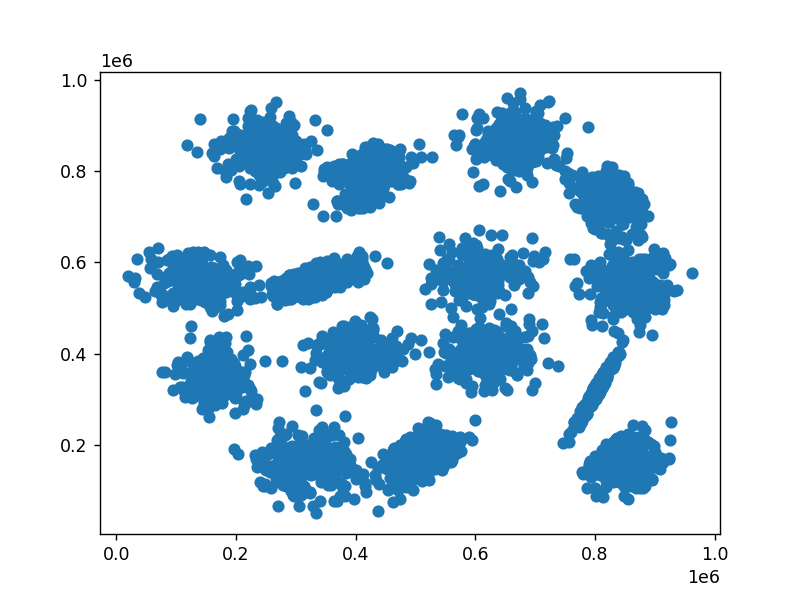

In [266]:
plt.scatter(dataset["X"],dataset["Y"])

In [267]:
x=dataset.values
kmeans=KMeans(n_clusters=13,random_state=0).fit(x)

In [268]:
kmeans.cluster_centers_

array([[827814.36031746, 234912.37936508],
       [417799.69426752, 787001.99363057],
       [369091.32884903, 481230.67563528],
       [606574.95622896, 574455.16835017],
       [141004.54285714, 557993.22      ],
       [320602.55      , 161521.85      ],
       [670929.06818182, 862765.73295455],
       [858457.71787709, 542682.97765363],
       [507818.31339031, 175610.41595442],
       [244654.8856305 , 847642.04105572],
       [168295.41492537, 347724.81791045],
       [617231.19767442, 399067.10465116],
       [823421.2507837 , 731145.27272727]])

In [269]:
kmeans.labels_

array([3, 3, 3, ..., 6, 6, 6])

<IPython.core.display.Javascript object>


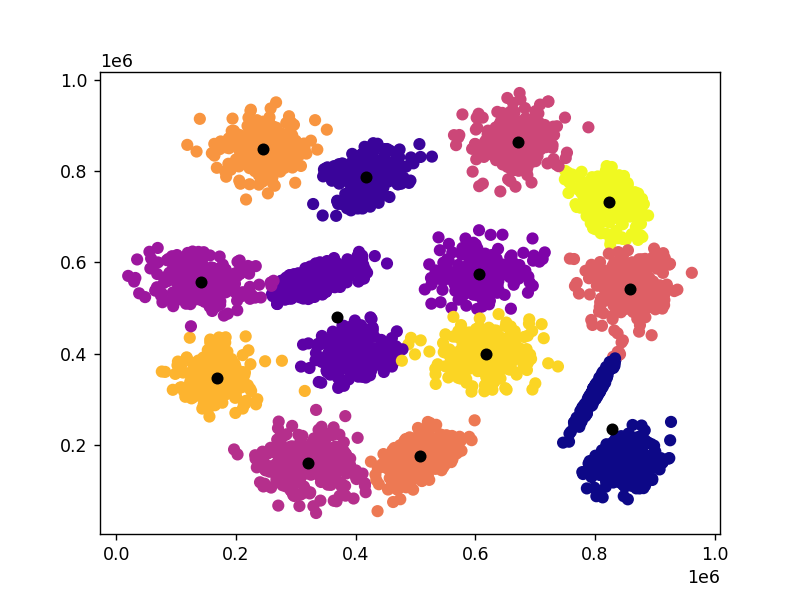

In [270]:
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure()
x=dataset["X"]
y=dataset["Y"]
plt.scatter(x,y,c=kmeans.labels_,cmap="plasma")

In [271]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=35,alpha=1,c="black")

In [272]:
x=dataset.values
y_predict=kmeans.predict(x)

In [273]:
y_predict

array([3, 3, 3, ..., 6, 6, 6])

<IPython.core.display.Javascript object>


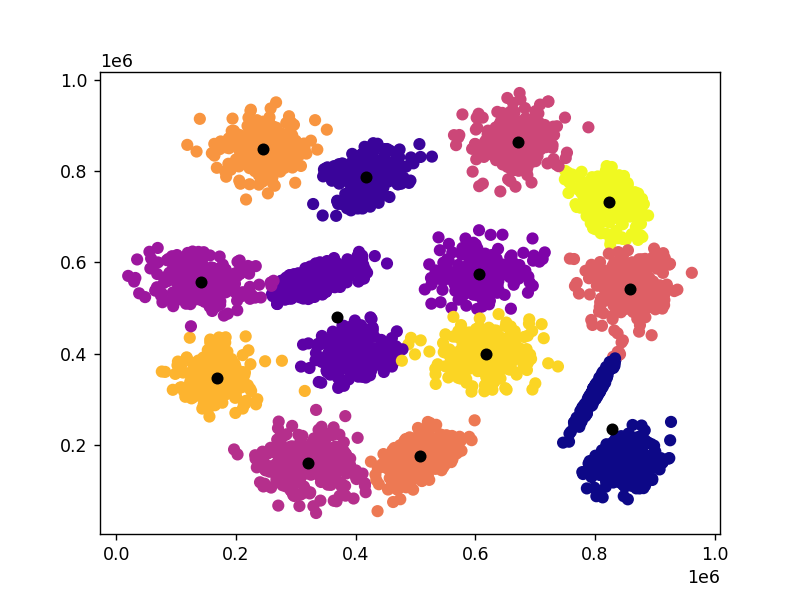

In [274]:
fig=plt.figure()
x=dataset["X"]
y=dataset["Y"]
plt.scatter(x,y,c=y_predict,cmap="plasma")

In [275]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=35,alpha=1,c="black")

In [276]:
k_range=range(1,30,2)
sse=[]
for k in k_range:
    p=dataset.values
    kmeans=KMeans(n_clusters=k,random_state=0).fit(p)
    sse.append(kmeans.inertia_)

In [277]:
sse

[576807041183705.8,
 213508993715095.12,
 104935701880791.05,
 63577401093803.08,
 40430344422512.44,
 28620639280989.35,
 18272604574064.152,
 8917615616867.26,
 8405116929490.32,
 7975996172106.915,
 7600209687582.753,
 7207751886070.716,
 6900389527948.97,
 6502520986266.459,
 6267883197073.899]

<IPython.core.display.Javascript object>


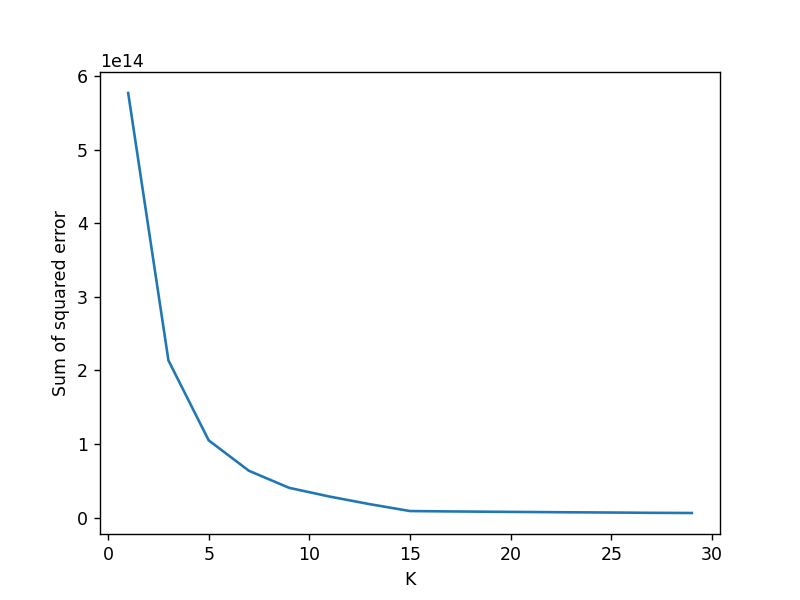

In [278]:
fig=plt.figure()

plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_range,sse)


Initially I thought that k=15 will be the ideal value for k but after looking at the elbow plot k=13 can be considered as the ideal value for k.

In [279]:
dataset=pd.read_csv("CarbonEmissionIndia.csv")

In [280]:
dataset.shape

(28, 4)

In [281]:
dataset.head()

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37


In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   States                          28 non-null     object 
 1   per capita CO2 (kg per person)  28 non-null     float64
 2   per capita CO (kg per person)   28 non-null     float64
 3   per capita CH4 (kg per person)  28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [283]:
dataset.describe()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
count,28.000000,28.000000,28.000000
mean,894.401071,18.293214,16.549286
std,547.619397,5.258928,6.599384
min,179.010000,8.830000,4.520000
25%,505.025000,14.847500,11.830000
50%,771.625000,17.495000,15.690000
75%,1058.092500,23.235000,20.232500
max,2662.510000,27.900000,33.380000


In [284]:
x=dataset.values[:,1:dataset.shape[1]]
kmeans=KMeans(n_clusters=3,random_state=0).fit(x)

In [285]:
kmeans.cluster_centers_

array([[1197.18333333,   23.47222222,   17.89444444],
       [2313.195     ,   20.34      ,   14.995     ],
       [ 567.18764706,   15.31058824,   16.02      ]])

In [286]:
kmeans.labels_

array([0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2])

In [287]:
kmeans.n_iter_

4

<IPython.core.display.Javascript object>


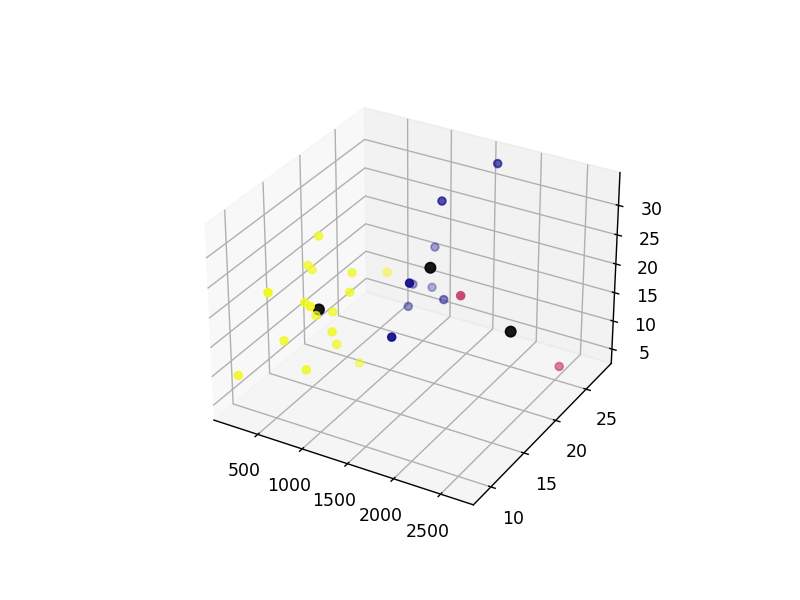

In [288]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=plt.axes(projection="3d")

In [289]:
x=dataset['per capita CO2 (kg per person)']
y=dataset['per capita CO (kg per person)']
z=dataset['per capita CH4 (kg per person)']

In [290]:
ax.scatter3D(x,y,z,c=kmeans.labels_,cmap="plasma")

In [291]:
ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c="black",s=35,alpha=0.9)

In [292]:
k_range=range(1,10,2)
sse=[]
for k in k_range:
    p=x=dataset.values[:,1:dataset.shape[1]]
    kmeans=KMeans(n_clusters=k,random_state=0).fit(p)
    sse.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


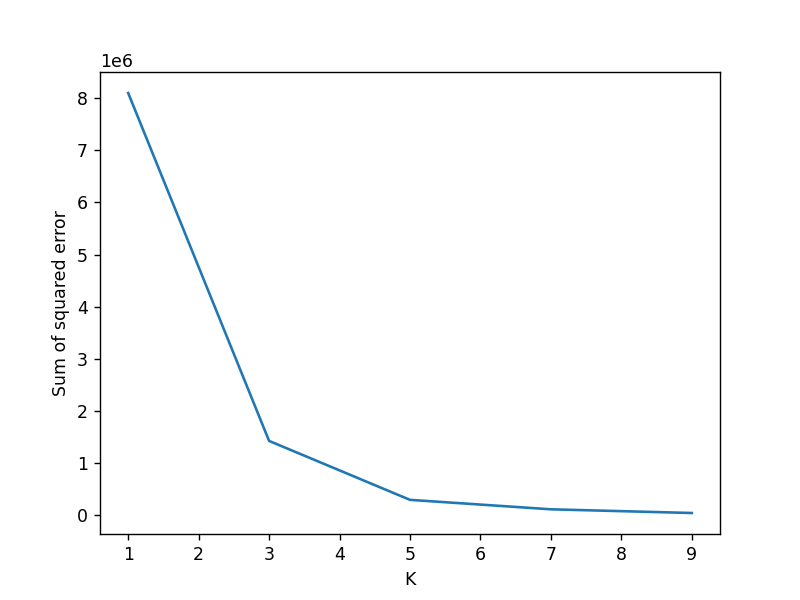

In [293]:
fig=plt.figure()

plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_range,sse)


From elbow plot it is clear that k=3 can be considered as the ideal value for k.